# Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

np.random.seed(0)
marker_color = "teal"

# Synthetic Linear data

In [2]:
X = np.linspace(-20, 80, 300)
noise = np.random.normal(loc=0, scale=10, size=300)
h = 3*X - 5
y = h + noise

X = X.reshape(-1, 1)

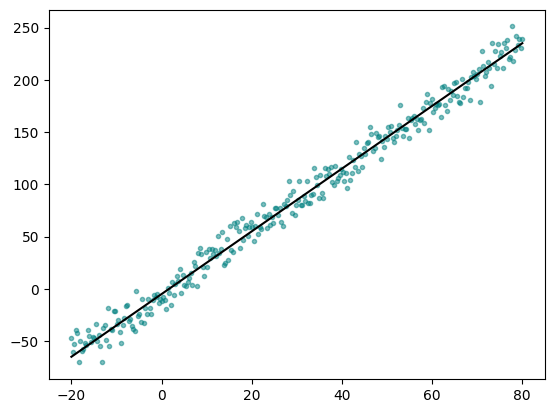

In [3]:
plt.scatter(X, y, marker=".", alpha=0.5, color=marker_color) # data
plt.plot(X, h, color="black") # h(x)
plt.show()

In [4]:
# By default, fit_intercept=True. This adds the extra feature of all 1s for you.
model = LinearRegression()
model.fit(X, y)

print(model.coef_, model.intercept_)

[2.9776512] -4.054240353884637


In [5]:
y_pred = model.predict(X)
rmse = root_mean_squared_error(y_true=y_pred, y_pred=y)
print(rmse)

9.986055468920453


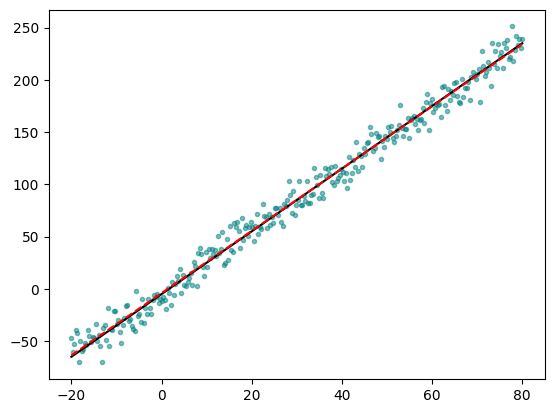

In [6]:
fig, ax = plt.subplots()
# data
ax.scatter(X, y, marker=".", alpha=0.5, color=marker_color)
# h(x)
ax.plot(X, h, color="black") # h(x)
# model(x)
ax.plot(X, model.predict(X), color="red", linestyle="--")

plt.show()

# Synthetic Quadratic data

In [7]:
X = np.linspace(-20, 80, 300)
noise = np.random.normal(loc=0, scale=10, size=300)
h = X**2 - 3*X + 5
y = h + noise

X = X.reshape(-1, 1)

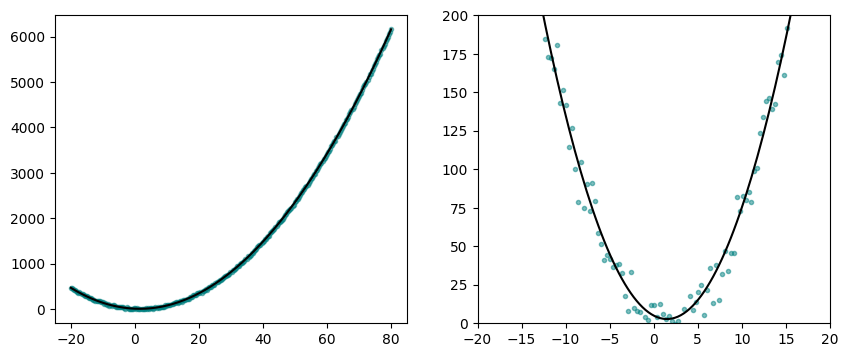

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for i in range(2):
    axes[i].scatter(X, y, marker=".", alpha=0.5, color=marker_color) # data
    axes[i].plot(X, h, color="black") # h(x)

# zoom in
axes[1].set_xlim(-20, 20)
axes[1].set_ylim(0, 200)

plt.show()

## Linear model

In [9]:
lin_model = LinearRegression()
lin_model.fit(X, y)

print(lin_model.coef_, lin_model.intercept_)

[56.99983842] -57.4619896629074


In [10]:
y_pred = lin_model.predict(X)
rmse = root_mean_squared_error(y_true=y_pred, y_pred=y)
print(rmse)

749.5402494069886


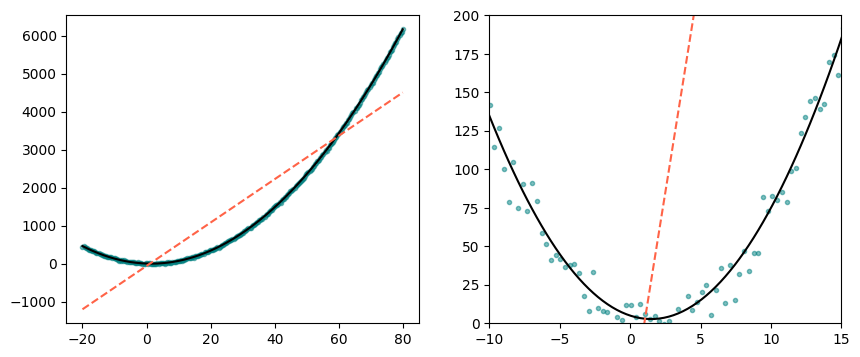

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for i in [0, 1]:
    # data
    axes[i].scatter(X, y, marker=".", alpha=0.5, color=marker_color)
    # h(x)
    axes[i].plot(X, h, color="black") # h(x)
    # model(x)
    axes[i].plot(X, lin_model.predict(X), color="tomato", linestyle="--")

axes[1].set_xlim(-10, 15)
axes[1].set_ylim(0, 200)

plt.show()

## Quadratic model

In [12]:
X_quad = np.concat([X**2, X], axis=-1)

In [13]:
X_quad[:5]

array([[400.        , -20.        ],
       [386.73392915, -19.66555184],
       [373.69156945, -19.33110368],
       [360.87292088, -18.99665552],
       [348.27798347, -18.66220736]])

In [14]:
quad_model = LinearRegression()
quad_model.fit(X_quad, y)

print(quad_model.coef_, quad_model.intercept_)

[ 0.99886043 -2.93178728] 3.5609216848229153


In [15]:
y_pred = quad_model.predict(X_quad)
rmse = root_mean_squared_error(y_true=y_pred, y_pred=y)
print(rmse)

9.958486955355756


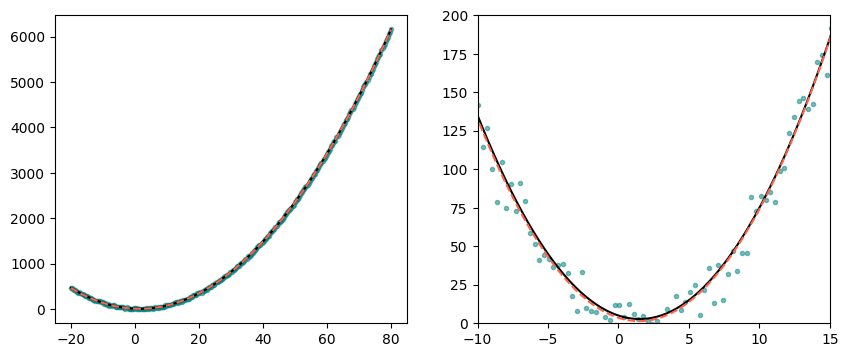

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for i in [0, 1]:
    # data
    axes[i].scatter(X, y, marker=".", alpha=0.5, color=marker_color)
    # h(x)
    axes[i].plot(X, h, color="black") # h(x)
    # model(x)
    axes[i].plot(X, quad_model.predict(X_quad), color="tomato", linestyle="--")

axes[1].set_xlim(-10, 15)
axes[1].set_ylim(0, 200)

plt.show()

# Diabetes dataset

In [17]:
df = pd.read_csv("../data/diabetes/data.csv", header=0)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [18]:
X = df.drop("y", axis="columns")
y = df["y"]

In [19]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [20]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: y, dtype: float64

In [21]:
# Train test split
from sklearn.model_selection import train_test_split

# Notice shuffle=True and random_state set.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42)

## Model

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [  0.13768782 -23.06446772   5.84636265   1.19709252  -1.28168474
   0.81115203   0.60165319  10.15953917  67.1089624    0.20159907]
Intercept: -341.3782363335059


## Evaluation

In [23]:
from sklearn.metrics import root_mean_squared_error, r2_score

In [24]:
def evaluate_model(X, y):
    y_pred = model.predict(X)

    rmse = root_mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    rmse = round(rmse, 3)
    r2 = round(r2, 3)

    print("RMSE:", rmse)
    print("R2 Score:", r2)

In [25]:
print(">>> Training data:")
evaluate_model(X_train, y_train)

print()

print(">>> Test data:")
evaluate_model(X_test, y_test)

>>> Training data:
RMSE: 53.559
R2 Score: 0.528

>>> Test data:
RMSE: 53.853
R2 Score: 0.453


In [26]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

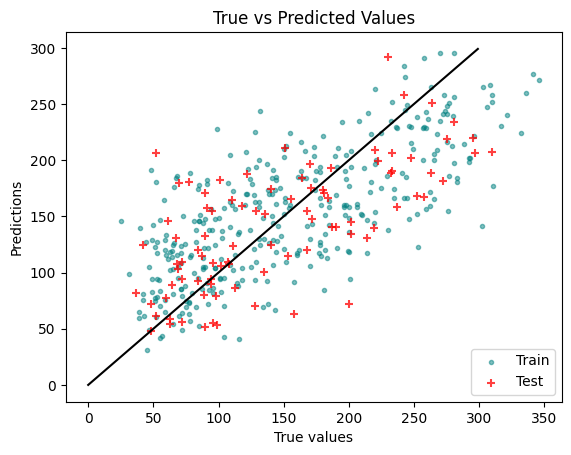

In [27]:
fig, ax = plt.subplots()

ax.scatter(y_train, model.predict(X_train), marker=".", alpha=0.50, color="teal", label="Train")
ax.scatter(y_test, model.predict(X_test), marker="+", alpha=0.75, color="red", label="Test")
ax.plot(range(300), range(300), color="black")
ax.set(
    xlabel="True values",
    ylabel="Predictions",
    title="True vs Predicted Values"
)
ax.legend(loc="lower right")

plt.show()

## Regularization

In [28]:
from sklearn.linear_model import Ridge, Lasso

In [29]:
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)

ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

lin_pred = model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

print("Ridge RMSE:", root_mean_squared_error(y_test, lin_pred))
print("Ridge RMSE:", root_mean_squared_error(y_test, ridge_pred))
print("Lasso RMSE:", root_mean_squared_error(y_test, lasso_pred))

Ridge RMSE: 53.853445836765886
Ridge RMSE: 53.87843950539717
Lasso RMSE: 54.008996898521836
